In [232]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

## Get Data

In [233]:
df_kend_train = pd.read_csv('./../dataset/kendaraan_train_clean.csv')
df_kend_train.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
137331,1.0,0.723077,1.0,0.538462,0.0,0.0,0.000000,0.986255,0.154321,0.349481
216987,1.0,0.492308,1.0,0.538462,0.0,0.0,0.000000,0.476567,0.154321,0.612457
52962,0.0,0.030769,1.0,0.346154,1.0,0.5,1.000000,0.611495,0.932099,0.499245
169399,0.0,0.046154,1.0,0.211538,1.0,0.5,0.495196,0.392272,0.925926,0.273356
71951,0.0,0.876923,1.0,0.538462,0.0,1.0,0.000000,0.535648,0.154321,0.522491


## Select Attribute for Clustering

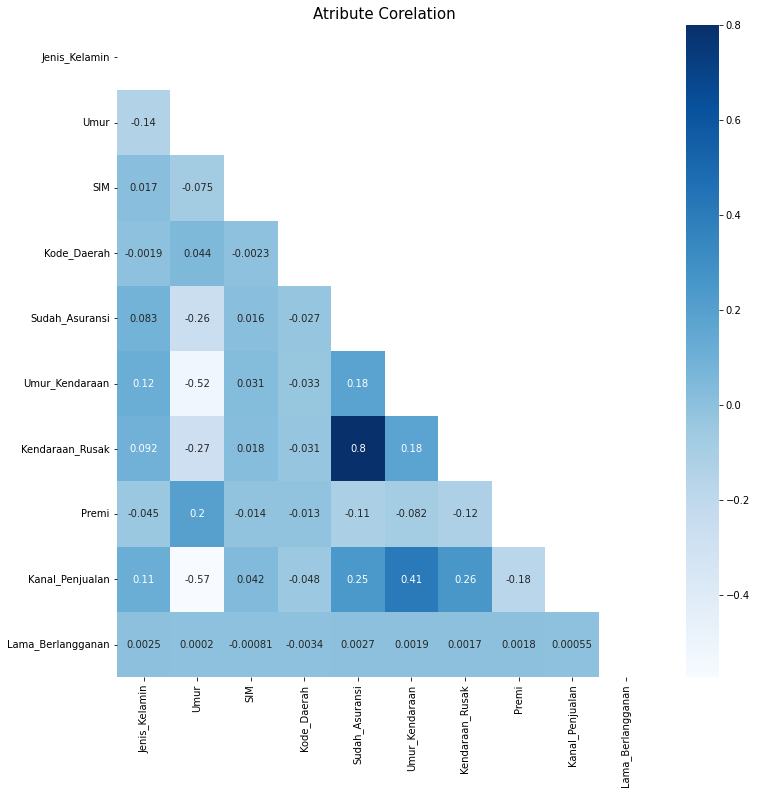

In [234]:
corr = df_kend_train.corr()
plt.figure(figsize=(12, 12))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=0.8, annot=True, cmap="Blues")
plt.title('Atribute Corelation', y=1, size=15)
plt.show()

In [235]:
df_kend_train =df_kend_train[['Umur', 'Kanal_Penjualan']]
df = df_kend_train.copy()
df.head()

,Umur,Kanal_Penjualan
0,0.153846,0.932099
1,0.430769,0.172840
2,0.015385,0.981481
3,0.461538,0.537037
4,0.015385,0.932099


In [236]:
print("Total Data", len(df))

Total Data 230625


## Kmeans Function

### Initiate Centroid with Random Value

In [237]:
def initialCentroid(k, df):
  randValue = {i: df[random.randint(0, len(df))] for i in range(k)}
  return randValue

### Calculate Distance Using Euclidean

In [238]:
def calcEuclidean(a, b):
  return math.sqrt((a[0]-b[0])**2 + (a[1] - b[1])**2)

def calcDist(df, cluster, centroid):
  for row in df:
    dist = [calcEuclidean(row, centroid[cen]) for cen in centroid]
    cluster[dist.index(min(dist))].append(row)
  return cluster

### Set New Centroid

In [239]:
def setCentroid(centroid, clusters):
  for cluster in clusters:
    centroid[cluster]= np.mean(clusters[cluster], axis=0)
  return centroid

### Main Function KMeans

In [240]:
def kMeans(k, df):    
  centroid = initialCentroid(k, df)
  # print(centroid)

  same = False
  i = 0
  while(same == False):
    old_centroid = centroid.copy()
    cluster = {i: [] for i in range(k)}
    cluster = calcDist(df, cluster, centroid)    
    centroid = setCentroid(centroid, cluster)        
    same = False
    for key in cluster.keys():      
      if((old_centroid.get(key) == centroid.get(key))[0]):
        same = True
        break    
    
    # old_centroid = centroid.copy()
    i+=1
  print('Perulangan ke', i-1)
  print('Hasil Akhir Cluster:')
  for key in centroid.keys():
    print(key, ': ', centroid.get(key))
  
  return centroid, cluster



## Main

In [241]:
# convert to array agar lebih mudah memprosesnya
data = df.to_numpy()
k = 3

centroid, cluster = kMeans(k, data)

Perulangan ke 7
Hasil Akhir Cluster:
0 :  [0.4684688  0.15268037]
1 :  [0.46823886 0.7715296 ]
2 :  [0.09607545 0.91460476]


## Proses Hasil

In [242]:
colorsPallete = ['orange', 'green', 'red', '#3980d5', '#7715d7']
# mengubah kembali ke dataframe dan menambah kolom warna untuk visualisasi nantinya
def convDf(clus):
  df_hasil = []
  # print(cluster.keys())
  for key in clus.keys():
    for c in clus.get(key):
      df_hasil.append((c[0], c[1], key, colorsPallete[key]))
  df_hasil = pd.DataFrame(df_hasil)
  df_hasil.columns = ['Umur', 'Kanal_Penjualan', 'Cluster Ke', 'Color']
  return df_hasil

df_hasil = convDf(cluster)
df_hasil.sample(5)

,Umur,Kanal_Penjualan,Cluster Ke,Color
90457,0.353846,0.685300,1,green
48635,0.307692,0.154321,0,orange
120921,0.153846,0.932099,2,red
228052,0.030769,0.932099,2,red
176476,0.076923,0.932099,2,red


## Visualisasi

No handles with labels found to put in legend.


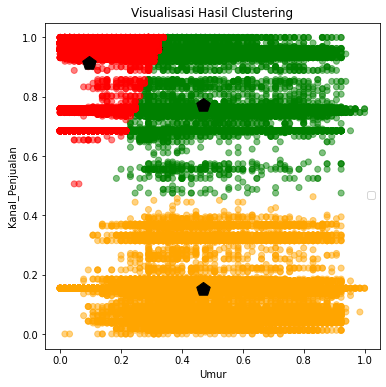

In [243]:
plt.figure(figsize=(6,6))
plt.title('Visualisasi Hasil Clustering')
plt.scatter(df_hasil['Umur'], df_hasil['Kanal_Penjualan'], color=df_hasil['Color'], alpha=0.5)
for i in range(k):
  plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='p',s=200)

plt.xlabel("Umur")
plt.ylabel("Kanal_Penjualan")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()


## Evaluasi Model

### Elbow Method

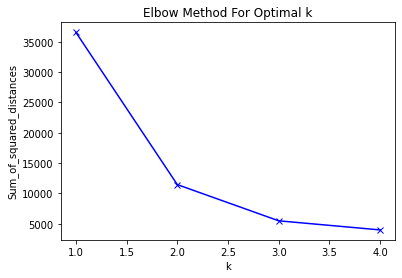

In [244]:
SS_distances = []
K = range(1,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    SS_distances.append(km.inertia_)

plt.plot(K, SS_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()